# Primary School Dataset

In [1]:
import io
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import tqdm

In [2]:
data_path = "./data/primaryschool.csv"

In [3]:
data = pd.read_csv(data_path, delimiter='\t', names=['time', 'a', 'b', 'class_a', 'class_b'])

In [4]:
data['time'] -= 31220

In [5]:
data

,time,a,b,class_a,class_b
0,0,1558,1567,3B,3B
1,0,1560,1570,3B,3B
2,0,1567,1574,3B,3B
3,0,1632,1818,4B,4B
4,0,1632,1866,4B,4B
...,...,...,...,...,...
125768,116900,1752,1783,1A,1A
125769,116900,1752,1789,1A,1A
125770,116900,1775,1798,1A,1A
125771,116900,1783,1796,1A,1A


In [6]:
# Convert into connection intervals
node_list = []

for i in tqdm.tqdm_notebook(range(len(data))):
    node_list.append(tuple([data.iloc[i][1], data.iloc[i][2], data.iloc[i][0] - 20, data.iloc[i][0]]))

print(len(node_list))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



125773


In [129]:
# Make Graphs

nodes = list(set(data['a']) | set(data['b']))
g = nx.Graph()
g.add_nodes_from(nodes)

In [130]:
list(g.nodes())

[1426,
 1427,
 1428,
 1429,
 1430,
 1431,
 1434,
 1435,
 1437,
 1439,
 1441,
 1443,
 1451,
 1452,
 1453,
 1457,
 1458,
 1459,
 1461,
 1465,
 1468,
 1471,
 1475,
 1477,
 1479,
 1480,
 1482,
 1483,
 1486,
 1489,
 1493,
 1495,
 1498,
 1500,
 1501,
 1502,
 1503,
 1504,
 1511,
 1516,
 1519,
 1520,
 1521,
 1522,
 1524,
 1525,
 1528,
 1532,
 1533,
 1538,
 1539,
 1545,
 1546,
 1548,
 1549,
 1551,
 1552,
 1555,
 1558,
 1560,
 1562,
 1563,
 1564,
 1567,
 1570,
 1572,
 1574,
 1578,
 1579,
 1580,
 1585,
 1592,
 1594,
 1601,
 1603,
 1604,
 1606,
 1609,
 1613,
 1616,
 1617,
 1618,
 1625,
 1628,
 1630,
 1632,
 1637,
 1641,
 1643,
 1647,
 1648,
 1649,
 1650,
 1653,
 1656,
 1661,
 1663,
 1664,
 1665,
 1666,
 1668,
 1670,
 1673,
 1674,
 1675,
 1680,
 1681,
 1682,
 1684,
 1685,
 1687,
 1688,
 1695,
 1696,
 1697,
 1698,
 1700,
 1702,
 1704,
 1705,
 1706,
 1707,
 1708,
 1709,
 1710,
 1711,
 1712,
 1713,
 1714,
 1715,
 1718,
 1719,
 1720,
 1722,
 1723,
 1727,
 1730,
 1731,
 1732,
 1735,
 1737,
 1738,
 1739,

In [9]:
# # Adding new edges to the original graph

# def connection_at_time(data, graph, starting_time, duration):
#     end_time = starting_time + duration
#     timeframe = list(np.arange(starting_time, end_time + 1, 20))
    
#     connection_df = pd.DataFrame(columns = ['a', 'b'])
#     for t in timeframe:
#         connection_data = data[data['time'] == t][['a', 'b']]
#         connection_df = connection_df.append(connection_data)

#     edges = []
#     for e in range(len(connection_df)):
#         edge = (connection_df.iloc[e][0], connection_df.iloc[e][1])
#         edges.append(edge)
#     print(edges)
#     graph.add_edges_from(edges)
    
#     return graph

In [131]:
# Creating a new graph

def connection_at_time(data, starting_time, duration):
    end_time = starting_time + duration
    timeframe = list(np.arange(starting_time, end_time, 20))
    
    connection_df = pd.DataFrame(columns = ['a', 'b'])
    for t in timeframe:
        connection_data = data[data['time'] == t][['a', 'b']]
        connection_df = connection_df.append(connection_data)

    edges = []
    for e in range(len(connection_df)):
        edge = (str(connection_df.iloc[e][0]), str(connection_df.iloc[e][1]))
        edges.append(edge)
#     print(edges)
    
    graph = nx.Graph()
    graph.add_edges_from(edges)
    
    return graph

In [69]:
gg = connection_at_time(data, 0, 3600)

[('1558', '1567'), ('1560', '1570'), ('1567', '1574'), ('1632', '1818'), ('1632', '1866'), ('1673', '1698'), ('1819', '1836'), ('1819', '1866'), ('1558', '1567'), ('1567', '1574'), ('1632', '1818'), ('1632', '1866'), ('1673', '1698'), ('1741', '1820'), ('1809', '1822'), ('1819', '1836'), ('1558', '1564'), ('1558', '1567'), ('1560', '1570'), ('1564', '1567'), ('1564', '1574'), ('1567', '1574'), ('1632', '1866'), ('1673', '1698'), ('1741', '1820'), ('1768', '1783'), ('1802', '1805'), ('1802', '1831'), ('1503', '1545'), ('1558', '1564'), ('1558', '1567'), ('1564', '1567'), ('1564', '1574'), ('1567', '1574'), ('1632', '1818'), ('1632', '1819'), ('1632', '1866'), ('1673', '1698'), ('1757', '1760'), ('1802', '1805'), ('1459', '1516'), ('1558', '1567'), ('1567', '1574'), ('1617', '1641'), ('1632', '1866'), ('1673', '1698'), ('1757', '1761'), ('1809', '1822'), ('1452', '1498'), ('1452', '1520'), ('1468', '1520'), ('1498', '1520'), ('1502', '1522'), ('1503', '1539'), ('1617', '1641'), ('1643', 

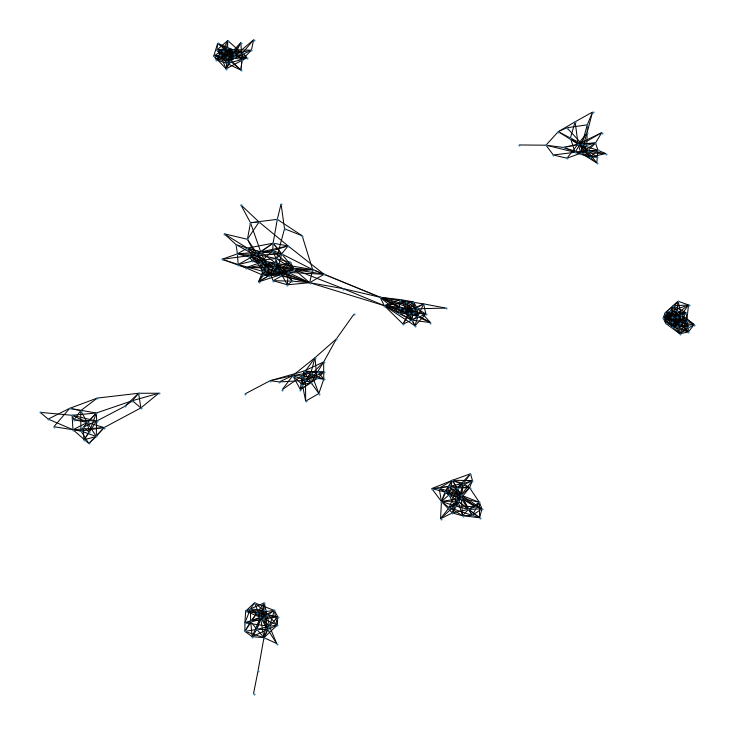

In [73]:
plt.figure(figsize=(10, 10))
nx.draw(gg, node_size=1)

In [79]:
edges = list(gg.edges())
edges

[('1558', '1567'),
 ('1558', '1564'),
 ('1558', '1579'),
 ('1558', '1574'),
 ('1558', '1735'),
 ('1558', '1555'),
 ('1558', '1727'),
 ('1558', '1685'),
 ('1558', '1560'),
 ('1558', '1731'),
 ('1567', '1574'),
 ('1567', '1564'),
 ('1567', '1594'),
 ('1567', '1560'),
 ('1567', '1579'),
 ('1567', '1712'),
 ('1567', '1727'),
 ('1567', '1562'),
 ('1567', '1552'),
 ('1567', '1707'),
 ('1567', '1735'),
 ('1567', '1700'),
 ('1567', '1555'),
 ('1560', '1570'),
 ('1560', '1594'),
 ('1560', '1579'),
 ('1560', '1685'),
 ('1560', '1712'),
 ('1560', '1709'),
 ('1560', '1731'),
 ('1560', '1707'),
 ('1560', '1735'),
 ('1560', '1551'),
 ('1560', '1574'),
 ('1560', '1580'),
 ('1560', '1727'),
 ('1560', '1555'),
 ('1570', '1562'),
 ('1570', '1580'),
 ('1570', '1564'),
 ('1570', '1709'),
 ('1570', '1712'),
 ('1574', '1564'),
 ('1574', '1735'),
 ('1574', '1700'),
 ('1574', '1707'),
 ('1574', '1727'),
 ('1574', '1562'),
 ('1574', '1685'),
 ('1574', '1555'),
 ('1574', '1709'),
 ('1574', '1579'),
 ('1632', '1

In [132]:
def convert_name(edge_list, time):
    converted = []
    
    for n1, n2 in edge_list:
        if len(n1) == 4:
            converted.append((n1 + '_{}'.format(time), n2 + '_{}'.format(time)))
        else:
            converted.append((n1[:4] + '_{}'.format(time), n2[:4] + '_{}'.format(time)))
    return converted

In [97]:
ll = convert_name(edges, 1)

In [98]:
ll

[('1558_1', '1567_1'),
 ('1558_1', '1564_1'),
 ('1558_1', '1579_1'),
 ('1558_1', '1574_1'),
 ('1558_1', '1735_1'),
 ('1558_1', '1555_1'),
 ('1558_1', '1727_1'),
 ('1558_1', '1685_1'),
 ('1558_1', '1560_1'),
 ('1558_1', '1731_1'),
 ('1567_1', '1574_1'),
 ('1567_1', '1564_1'),
 ('1567_1', '1594_1'),
 ('1567_1', '1560_1'),
 ('1567_1', '1579_1'),
 ('1567_1', '1712_1'),
 ('1567_1', '1727_1'),
 ('1567_1', '1562_1'),
 ('1567_1', '1552_1'),
 ('1567_1', '1707_1'),
 ('1567_1', '1735_1'),
 ('1567_1', '1700_1'),
 ('1567_1', '1555_1'),
 ('1560_1', '1570_1'),
 ('1560_1', '1594_1'),
 ('1560_1', '1579_1'),
 ('1560_1', '1685_1'),
 ('1560_1', '1712_1'),
 ('1560_1', '1709_1'),
 ('1560_1', '1731_1'),
 ('1560_1', '1707_1'),
 ('1560_1', '1735_1'),
 ('1560_1', '1551_1'),
 ('1560_1', '1574_1'),
 ('1560_1', '1580_1'),
 ('1560_1', '1727_1'),
 ('1560_1', '1555_1'),
 ('1570_1', '1562_1'),
 ('1570_1', '1580_1'),
 ('1570_1', '1564_1'),
 ('1570_1', '1709_1'),
 ('1570_1', '1712_1'),
 ('1574_1', '1564_1'),
 ('1574_1',

In [161]:
# Plot space_time

def space_time(graph, duration=1):
    
    hour = duration * 3600
    
    # position at 0
    
    space_time_graph = nx.Graph()
    pos_dict = dict()
    
    for t in range(duration + 1):
        
        if t == 0:
            for idx, n in enumerate(graph.nodes()):
                pos = (t, idx + 1)
                pos_dict[str(n)] = idx + 1
                space_time_graph.add_node(n, pos=pos)
            initial_nodes = list(space_time_graph.nodes())
                
        else:
            
            contact = connection_at_time(data, (t - 1) * 3600, t * 3600)
            converted_edges = convert_name(list(contact.edges()), t)
            next_graph = nx.Graph()
            next_graph.add_edges_from(converted_edges)
            
            # Add nodes at the next time frame
            for n in next_graph.nodes():
                pos = (t, pos_dict[n[:4]])
                space_time_graph.add_node(n, pos=pos)
            
            # Add edges
#             print(next_graph.edges())
            space_time_graph.add_edges_from(next_graph.edges())
            for n in next_graph.nodes():
                if n[:4] in initial_nodes:
                    space_time_graph.add_edge(n[:4], n)
                    initial_nodes.remove(n[:4])
                elif n[:4] + '_{}'.format(t-1) in initial_nodes:
                    space_time_graph.add_edge(n[:4] + '_{}'.format(t-1), n)
                    initial_nodes.remove(n[:4] + '_{}'.format(t-1))
                initial_nodes.append(n)

            
    # Draw the network        
    pos = nx.get_node_attributes(space_time_graph, 'pos')
    plt.figure(figsize=(20, 20))
    nx.draw(space_time_graph, pos, node_size=5, connectionstyle="arc3,rad=0.1")
    plt.show()

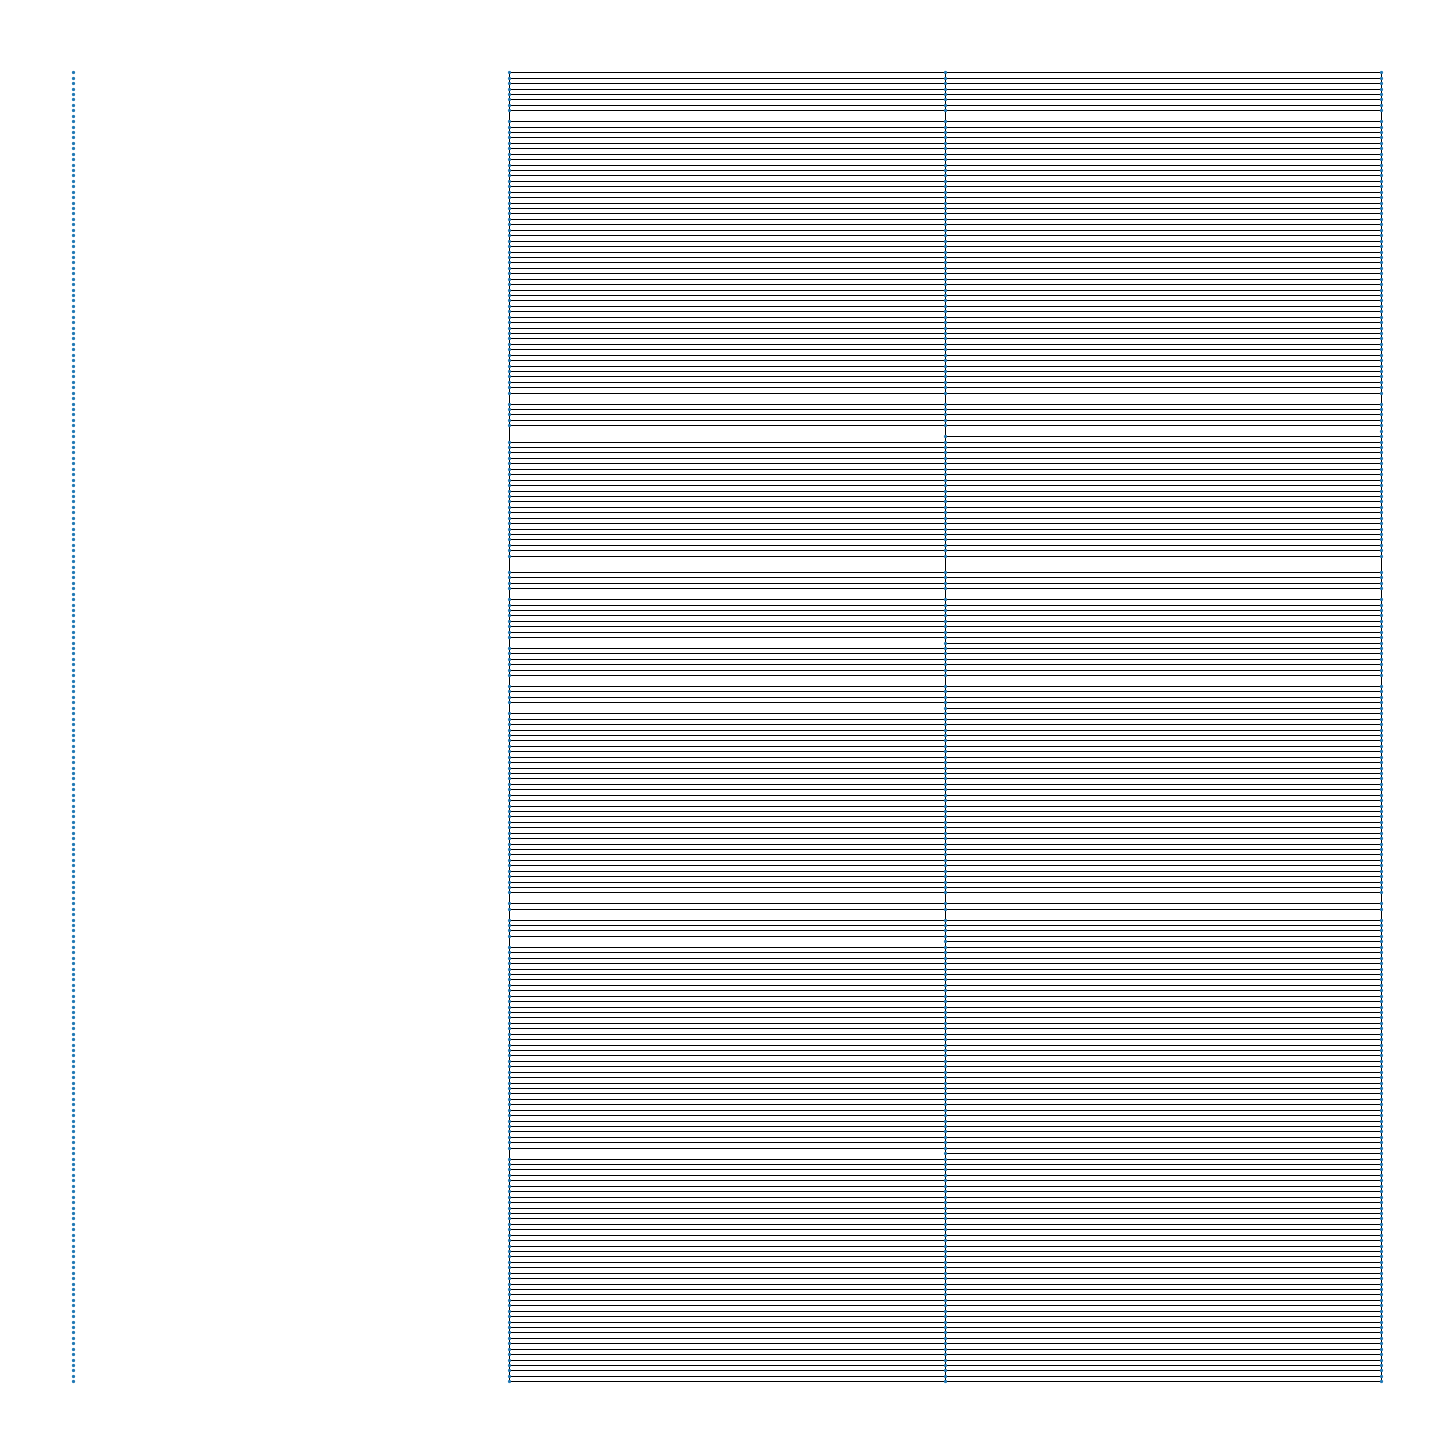

In [163]:
space_time(g, 3)

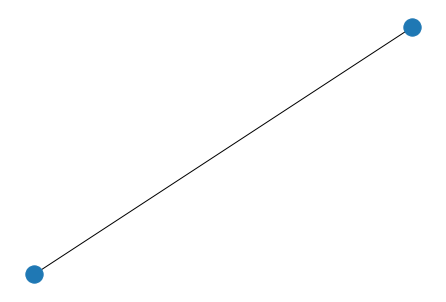

In [160]:
# pos practice
gg = nx.Graph()
gg.add_node(1, pos=(1, 1))
gg.add_node(2, pos=(2, 2))
gg.add_edge(1, 2)
pos = nx.get_node_attributes(gg, 'pos')
nx.draw(gg, pos, connectionstyle="arc3,rad=100")
plt.show()

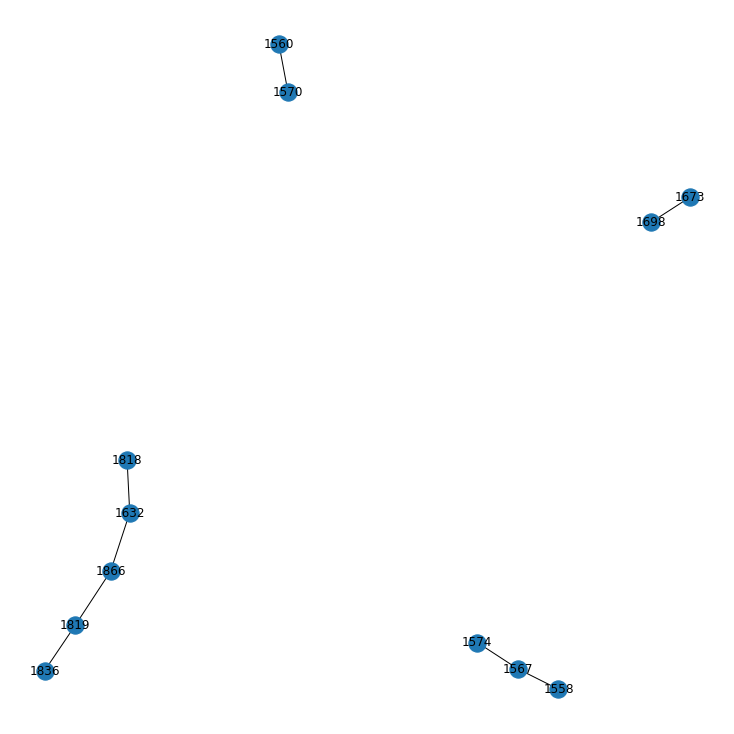

In [24]:
pos=nx.spring_layout(gg)
plt.figure(figsize=(10, 10))
nx.draw(gg, pos, with_labels=True)
plt.show()